In [3]:
%load_ext tensorboard

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [4]:
num_classes = 2
class AlexNet(Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()
        self.add(Conv2D(96, kernel_size=(11,11),strides=4, padding='valid', activation='relu', input_shape=input_shape, kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid', data_format='channels_last'))

        self.add(Conv2D(256, kernel_size=(5,5),strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))
        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid', data_format='channels_last'))

        self.add(Conv2D(384, kernel_size=(3,3),strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))

        self.add(Conv2D(384, kernel_size=(3,3),strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))

        self.add(Conv2D(256, kernel_size=(3,3),strides=1, padding='same', activation='relu', kernel_initializer='he_normal'))

        self.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid', data_format='channels_last'))

        self.add(Flatten())
        self.add(Dense(4096, activation='relu'))
        self.add(Dense(4096, activation='relu'))
        self.add(Dense(1000, activation='relu'))
        self.add(Dense(num_classes, activation='relu'))

        self.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
model = AlexNet((100, 100, 3), num_classes)
model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-02-05 00:51:58.958368: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-05 00:51:58.958555: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "alex_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 256)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 384)         132

In [6]:
EPOCHS = 100
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = '/Users/jhyunwoo/Documents/Programing/tensorflow-study/080263/chap6/data/catanddog/train'
valid_dir = '/Users/jhyunwoo/Documents/Programing/tensorflow-study/080263/chap6/data/catanddog/validation'

train = ImageDataGenerator(rescale=1./255, rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir, target_size=(image_height, image_width), color_mode="rgb", batch_size=BATCH_SIZE, seed=1, shuffle=True, class_mode='categorical')

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir, target_size=(image_height, image_width), color_mode="rgb", batch_size=BATCH_SIZE, seed=7, shuffle=True, class_mode='categorical')

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [7]:
log_dir = '/Users/jhyunwoo/Documents/Programing/tensorflow-study/080263/chap6/img/log6-2'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch=0)

model.fit(train_generator, epochs=EPOCHS, steps_per_epoch=train_num //BATCH_SIZE, validation_data=valid_generator, validation_steps=valid_num // BATCH_SIZE, callbacks=[tensorboard_callback], verbose=1)

2022-02-05 01:02:02.259134: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-02-05 01:02:02.533698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 7.7166 - accuracy: 0.5212

2022-02-05 01:02:05.812274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 6s 405ms/step - loss: 7.7166 - accuracy: 0.5212 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 3s 294ms/step - loss: 7.6709 - accuracy: 0.5241 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 3/100
12/12 [==============================] - 3s 278ms/step - loss: 7.7166 - accuracy: 0.5212 - val_loss: 8.2269 - val_accuracy: 0.4896
Epoch 4/100
12/12 [==============================] - 3s 245ms/step - loss: 7.5796 - accuracy: 0.5297 - val_loss: 8.0590 - val_accuracy: 0.5000
Epoch 5/100
12/12 [==============================] - 3s 240ms/step - loss: 7.6709 - accuracy: 0.5241 - val_loss: 8.2269 - val_accuracy: 0.4896
Epoch 6/100
12/12 [==============================] - 3s 241ms/step - loss: 7.8079 - accuracy: 0.5156 - val_loss: 7.8912 - val_accuracy: 0.5104
Epoch 7/100
12/12 [==============================] - 3s 236ms/step - loss: 7.6709 - accuracy: 0.5241 - val_loss: 8.2269 - val_accuracy: 0.4896
Epoch 8/100

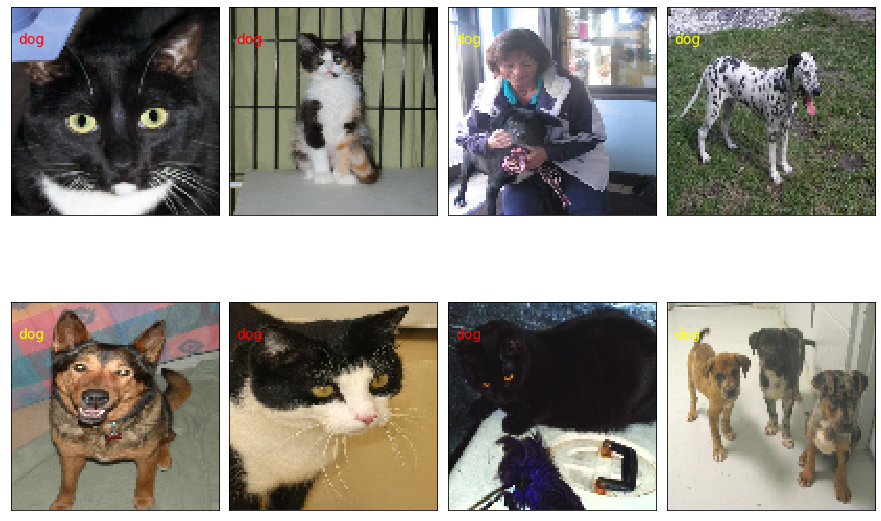

In [12]:
class_names = ['cat', 'dog']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
      
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)